# Dimensionaltiy Reduction 
1. Space efficiency - makes data small
2. Computing efficiency It fastens the time required for performing same computations. 
Less dimensions leads to less computing,  also less dimensions can allow usage of algorithms unfit for a large number of dimensions like linear regression
3. Visualizations!

In [1]:
import numpy as np
np.random.seed(1) # to have better debugging.To have same starting point

In [2]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [3]:
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Draw random samples from a multivariate normal distribution.
#also called Gaussian distribution
#https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Gaussian_2d.png/786px-Gaussian_2d.png
#uses mean to define center ,covariance for width, or standard deviation. how wide. how spread.
#btw Covariance is a measure of how changes in one variable are associated with changes in a second variable. 
#Specifically, covariance measures the degree to which two variables are linearly associated.
mu_vec1 = np.array([0,0,0])  # sample mean
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # sample covariance
#Transpose of a Matrix. A matrix which is 
#formed by turning all the rows of a given matrix into columns and vice-versa. 
#convenience, for printing
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print (class1_sample)

[[ 1.62434536 -1.07296862  1.74481176 -0.24937038 -0.3224172  -1.09989127
   0.04221375  1.14472371  0.90085595 -0.93576943 -0.69166075 -0.84520564
  -1.11731035  0.74204416 -0.74715829 -0.63699565  0.12015895 -0.35224985
  -0.20889423  0.93110208]
 [-0.61175641  0.86540763 -0.7612069   1.46210794 -0.38405435 -0.17242821
   0.58281521  0.90159072 -0.68372786 -0.26788808 -0.39675353 -0.67124613
   0.2344157  -0.19183555  1.6924546   0.19091548  0.61720311 -1.1425182
   0.58662319  0.28558733]
 [-0.52817175 -2.3015387   0.3190391  -2.06014071  1.13376944 -0.87785842
  -1.10061918  0.50249434 -0.12289023  0.53035547 -0.6871727  -0.0126646
   1.65980218 -0.88762896  0.05080775  2.10025514  0.30017032 -0.34934272
   0.83898341  0.88514116]]


create class 2 random sampled 3 x 20 data set

In [5]:
mu_vec2 = np.array([1,1,1]) # sample mean
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample covariance
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
print (class2_sample)

[[ 0.24560206  0.70190716  2.13162939 -0.39649634  1.16003707 -1.02220122
   1.23009474  0.79924193  1.19829972  1.37756379  2.19891788  0.36126959
   0.65614632  1.69803203  1.40349164  1.16938243  0.73378149  1.31515939
   1.35054598 -0.61577235]
 [ 2.25286816  1.48851815  2.51981682 -0.44411381  1.87616892  0.69379599
   1.76201118  1.18656139  1.11900865  1.12182127  1.18515642  1.42349435
   1.04359686  0.55287144  1.59357852  1.74055645  1.03261455  1.84616065
  -0.31228341  2.12141771]
 [ 1.51292982  0.92442829  3.18557541  0.49553414  1.31563495  1.82797464
   0.77767186  1.41005165  0.32933771  2.12948391  0.62471505  1.07734007
   0.37999916  2.2245077  -0.09491185  0.0462994  -0.37311732  0.14048406
   0.96130449  1.40890054]]


Populating the interactive namespace from numpy and matplotlib


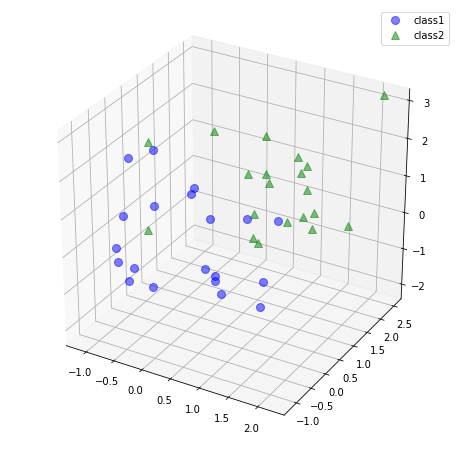

In [9]:
%pylab inline

#plotting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#figure, width and height
fig = plt.figure(figsize=(8,8))
#3d subplot
#These are subplot grid parameters encoded as a single integer, so 1x1 grid 1st subplot
ax = fig.add_subplot(111, projection='3d')
#fontsize
plt.rcParams['legend.fontsize'] = 10

#plot samples
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=0.5, color='green', label='class2')

ax.legend(loc='upper right')

plt.show()

# step 1. take the whole data set ignoring classes

In [10]:
#make it one big dataset
#3 x 40 still 3 features
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

In [12]:
all_samples[:5]

array([[ 1.62434536, -1.07296862,  1.74481176, -0.24937038, -0.3224172 ,
        -1.09989127,  0.04221375,  1.14472371,  0.90085595, -0.93576943,
        -0.69166075, -0.84520564, -1.11731035,  0.74204416, -0.74715829,
        -0.63699565,  0.12015895, -0.35224985, -0.20889423,  0.93110208,
         0.24560206,  0.70190716,  2.13162939, -0.39649634,  1.16003707,
        -1.02220122,  1.23009474,  0.79924193,  1.19829972,  1.37756379,
         2.19891788,  0.36126959,  0.65614632,  1.69803203,  1.40349164,
         1.16938243,  0.73378149,  1.31515939,  1.35054598, -0.61577235],
       [-0.61175641,  0.86540763, -0.7612069 ,  1.46210794, -0.38405435,
        -0.17242821,  0.58281521,  0.90159072, -0.68372786, -0.26788808,
        -0.39675353, -0.67124613,  0.2344157 , -0.19183555,  1.6924546 ,
         0.19091548,  0.61720311, -1.1425182 ,  0.58662319,  0.28558733,
         2.25286816,  1.48851815,  2.51981682, -0.44411381,  1.87616892,
         0.69379599,  1.76201118,  1.18656139,  1.

In [13]:
all_samples.shape

(3, 40)

In [16]:
all_sample_transpose=all_samples.T

In [17]:
all_sample_transpose.shape

(40, 3)

In [18]:
all_sample_transpose[:5]

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435,  1.13376944]])

## step 2. compute the d dimensional mean vector, to help compute covariance matrix

In [19]:
#mean for each feature
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

#3D mean vector
mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.41667492]
 [0.69848315]
 [0.49242335]]


# step 3. compute the covariance matrix

In [20]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[0.9868668  0.26943262 0.2855759 ]
 [0.26943262 0.92914135 0.30682016]
 [0.2855759  0.30682016 1.27528118]]


# Step 4. computer eigenvectors and eigenvalues

In [21]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))

Eigenvector 1: 
[[-0.49210223]
 [-0.47927902]
 [-0.72672348]]
Eigenvalue 1 from scatter matrix: 1.67100943053287
Eigenvector 2: 
[[-0.64670286]
 [-0.35756937]
 [ 0.67373552]]
Eigenvalue 2 from scatter matrix: 0.8383259734158452
Eigenvector 3: 
[[ 0.58276136]
 [-0.8015209 ]
 [ 0.13399043]]
Eigenvalue 3 from scatter matrix: 0.6819539303101816


# step 5. sort eigenvector by decreasing value

In [22]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i])
             for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

1.67100943053287
0.8383259734158452
0.6819539303101816


### step 5.2 choose k eigenvectos w largest eigenvalues to form d x k matrix

In [23]:
#k is 2 
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                      eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


# step 6. use d x k to transform samples to new subspace

In [24]:
#dot product between orignal matrix and eigen pairs
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

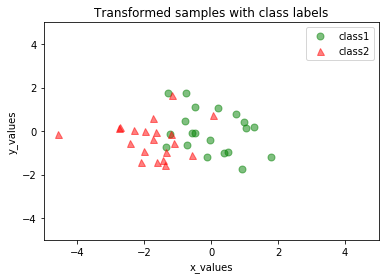

In [25]:
plt.plot(transformed[0,0:20], transformed[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# Notes

Best visualizations
T-SNE

Best generic dim r method 
PCA 

Best for supervised
LDA


T-SNE

- Step 1 - Compute similarity matrix between all feature vectors
- Step 2 - Compute similarity matrix from map points
- Step 3 - Use gradient descent to minimimze distance between matrices

LDA (Linear Discriminant Analysis)

Similar to LDA except Compute the  M mean vectors for the different classes from the dataset
instead of #Take the whole dataset consisting of dd-dimensional samples ignoring the class labels
Compute the dd-dimensional mean vector (i.e., the means for every dimension of the whole dataset).